# Lab 3: Data Manipulation


## Preliminaries

1. Piazza reminders
    - When asking a homework question, gather all relevant information to your problem to make it *reproducible*
        - What code did you run before running into your problem?
        - What does the output say?
        - Take a screenshot or picture for best results
2. Google Colab demonstration
    - Download the homework/lecture from github (.ipynb file). 
    - Open Google colab: https://colab.research.google.com/notebooks/, and choose the "upload" option. Choose the file you've downloaded from github. 
    - If you want to make a new notebook from scratch, you can use this link: https://colab.research.google.com/#create=true&language=r
    - Save as pdf: click file - print - save as pdf.

In [1]:
library(tidyverse) # load tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
tennis_data <- read.csv('https://raw.githubusercontent.com/bmanzo/stats306_labs/master/lab03/FrenchOpen-men-2013.csv')

In [4]:
head(tennis_data)

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,⋯,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Pablo Carreno-Busta,Roger Federer,1,0,0,3,62,27,38,11,⋯,7,7,14,18,88,6,6,6,NA,NA
2,Somdev Devvarman,Daniel Munoz-De La Nava,1,1,3,0,62,54,38,22,⋯,1,16,22,25,106,3,3,5,NA,NA
3,Tobias Kamke,Paolo Lorenzi,1,1,3,2,62,53,38,15,⋯,10,18,19,27,139,3,3,6,6,3
4,Julien Benneteau,Ricardas Berankis,1,1,3,1,72,87,28,19,⋯,4,13,33,43,149,6,3,7,6,NA
5,Lukas Lacko,Sam Querrey,1,0,0,3,52,31,48,22,⋯,4,7,12,13,93,6,6,6,NA,NA
6,Jan Hajek,Denis Kudla,1,1,3,1,70,58,30,18,⋯,1,7,6,9,93,2,7,0,4,NA


https://archive.ics.uci.edu/ml/datasets/Tennis+Major+Tournament+Match+Statistics#

## `dplyr` functions

The `filter` function is used to retrieve a subset of the full dataset

Roger Federer is a very famous tennis player. Let's use `filter` to find all the matches in which he played in the 2013 French Open.

In [5]:
(federer <- tennis_data %>% 
            filter(Player1 == 'Roger Federer' | Player2 == 'Roger Federer'))

Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,⋯,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Pablo Carreno-Busta,Roger Federer,1,0,0,3,62,27,38,11,⋯,7,7,14,18,88,6,6,6,NA,NA
Somdev Devvarman,Roger Federer,2,0,0,3,61,19,39,16,⋯,7,14,19,30,88,6,6,6,NA,NA
Julien Benneteau,Roger Federer,3,0,0,3,82,41,18,8,⋯,4,4,8,11,98,6,6,7,NA,NA
Gilles Simon,Roger Federer,4,0,2,3,61,65,39,28,⋯,6,14,25,35,147,6,4,2,6,6
Jo-Wilfried Tsonga,Roger Federer,5,1,3,0,75,46,25,10,⋯,2,3,15,30,73,5,3,3,NA,NA


If you want to assign as well as print the variable, enclose the command in parentheses.

The above table is useful, but we don't need all of the columns. We can use `select` to only show a subset of the columns. Create a new table, `fed_select`, which only shows the fields `Player1`, `Player2`, `Round`, and `Result`.

In [6]:
names(federer)

[1] "Player1" "Player2" "Round"   "Result"  "FNL.1"   "FNL.2"   "FSP.1"  
 [8] "FSW.1"   "SSP.1"   "SSW.1"   "ACE.1"   "DBF.1"   "WNR.1"   "UFE.1"  
[15] "BPC.1"   "BPW.1"   "NPA.1"   "NPW.1"   "TPW.1"   "ST1.1"   "ST2.1"  
[22] "ST3.1"   "ST4.1"   "ST5.1"   "FSP.2"   "FSW.2"   "SSP.2"   "SSW.2"  
[29] "ACE.2"   "DBF.2"   "WNR.2"   "UFE.2"   "BPC.2"   "BPW.2"   "NPA.2"  
[36] "NPW.2"   "TPW.2"   "ST1.2"   "ST2.2"   "ST3.2"   "ST4.2"   "ST5.2"

In [7]:
(fed_select <- tennis_data %>% 
                 filter(Player1=='Roger Federer' | Player2=='Roger Federer') %>% select(Player1:Result))

Player1,Player2,Round,Result
<chr>,<chr>,<int>,<int>
Pablo Carreno-Busta,Roger Federer,1,0
Somdev Devvarman,Roger Federer,2,0
Julien Benneteau,Roger Federer,3,0
Gilles Simon,Roger Federer,4,0
Jo-Wilfried Tsonga,Roger Federer,5,1


We can use functions such as `between` or the `%in%` operator. 

In [8]:
1 %in% c(1,2,3,4)

[1] TRUE

In [9]:
top_three <- tennis_data %>% 
                filter(Player1 %in% c('Roger Federer', 'Novak Djokovic', 'Rafael Nadal') | Player2 %in% c('Roger Federer', 'Novak Djokovic', 'Rafael Nadal'))

In [10]:
middle_round <- tennis_data %>% 
                filter(between(Round, 3, 5))

Suppose we are interested in the later rounds of the tournament. We can use the `arrange` function to order rows instead of filtering for a subset of them. 

In [11]:
tennis_data %>% arrange(desc(Round))

Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,⋯,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Rafael Nadal,David Ferrer,7,1,3,0,70,43,30,11,⋯,3,12,10,14,72,3,2,3,NA,NA
David Ferrer,Jo-Wilfried Tsonga,6,1,3,0,60,35,40,23,⋯,2,5,7,16,84,1,6,2,NA,NA
Novak Djokovic,Rafael Nadal,6,0,2,3,67,76,33,30,⋯,8,16,15,26,177,6,3,6,6,9
Jo-Wilfried Tsonga,Roger Federer,5,1,3,0,75,46,25,10,⋯,2,3,15,30,73,5,3,3,NA,NA
Tommy Robredo,David Ferrer,5,0,0,3,59,22,41,9,⋯,7,12,13,15,84,6,6,6,NA,NA
Rafael Nadal,Stanislas Wawrinka,5,1,3,0,75,40,25,11,⋯,1,5,16,30,64,2,3,1,NA,NA
Novak Djokovic,Tommy Haas,5,1,3,0,64,41,36,22,⋯,2,2,2,17,84,3,6,5,NA,NA
Gilles Simon,Roger Federer,4,0,2,3,61,65,39,28,⋯,6,14,25,35,147,6,4,2,6,6
Jo-Wilfried Tsonga,Viktor Troicki,4,1,3,0,77,45,23,15,⋯,0,3,19,28,70,3,3,3,NA,NA


Notice how in the above code, we use `desc()` to sort from largest to smallest. 

Unforced errors are bad, so we might be interested in finding matches with the fewest unforced errors.  
Again we'll use the `select` function because we are only interested in some of the columns. 

In [12]:
tennis_data %>% 
    arrange(UFE.1 + UFE.2) %>% 
    select(Player1:Result, UFE.1, UFE.2) %>% head() # use head so the whole table doesn't print out

,Player1,Player2,Round,Result,UFE.1,UFE.2
,<chr>,<chr>,<int>,<int>,<int>,<int>
1,Dmitry Tursunov,Victor Hanescu,2,0,15,10
2,Alejandro Falla,Grigor Dimitrov,1,0,15,16
3,Jurgen Zopp,Tommy Robredo,1,0,27,7
4,Blaz Kavcic,James Duckworth,1,1,8,27
5,Igor Sijsling,Jurgen Melzer,1,1,16,22
6,Nick Kyrgios,Marin Cilic,2,0,23,15


Remember that `select` has some helper functions. How could we rewrite the above code using `starts_with`?

In [13]:
tennis_data %>% 
    arrange(UFE.1+UFE.2) %>% 
    select(Player1:Result, starts_with('UFE')) %>% 
    head()

,Player1,Player2,Round,Result,UFE.1,UFE.2
,<chr>,<chr>,<int>,<int>,<int>,<int>
1,Dmitry Tursunov,Victor Hanescu,2,0,15,10
2,Alejandro Falla,Grigor Dimitrov,1,0,15,16
3,Jurgen Zopp,Tommy Robredo,1,0,27,7
4,Blaz Kavcic,James Duckworth,1,1,8,27
5,Igor Sijsling,Jurgen Melzer,1,1,16,22
6,Nick Kyrgios,Marin Cilic,2,0,23,15


We can also use `contains()`

In [14]:
tennis_data %>% 
    arrange(UFE.1+UFE.2) %>% 
    select(Player1:Result, contains('UFE')) %>% 
    head()

,Player1,Player2,Round,Result,UFE.1,UFE.2
,<chr>,<chr>,<int>,<int>,<int>,<int>
1,Dmitry Tursunov,Victor Hanescu,2,0,15,10
2,Alejandro Falla,Grigor Dimitrov,1,0,15,16
3,Jurgen Zopp,Tommy Robredo,1,0,27,7
4,Blaz Kavcic,James Duckworth,1,1,8,27
5,Igor Sijsling,Jurgen Melzer,1,1,16,22
6,Nick Kyrgios,Marin Cilic,2,0,23,15


Notice that variables corresponding to `Player1` end in `1`. How would we select all the player 1 variables?

In [15]:
tennis_data %>% 
    select(ends_with('1')) %>% 
    head() 

,Player1,FNL.1,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Pablo Carreno-Busta,0,62,27,38,11,1,3,12,29,1,3,9,20,50,2,2,3,NA,NA
2,Somdev Devvarman,3,62,54,38,22,7,3,26,20,5,8,12,21,120,6,6,7,NA,NA
3,Tobias Kamke,3,62,53,38,15,4,6,42,55,10,22,14,32,140,6,6,3,0,6
4,Julien Benneteau,3,72,87,28,19,14,2,48,27,4,13,14,30,163,7,6,5,7,NA
5,Lukas Lacko,0,52,31,48,22,4,4,21,24,1,1,3,5,72,3,4,4,NA,NA
6,Jan Hajek,3,70,58,30,18,4,4,35,36,6,12,8,10,130,6,5,6,6,NA


### `mutate`

We are likely interested in some aggregate statistics, i.e., combining the results of players 1 and 2 in a match. We'll use `mutate` to create new variables to analyze these statistics.  

Suppose we're interested in looking at the length of matches (how many sets are played). One way to do this is to add `FNL1` (total number of sets won by player 1) to `FNL2` (total for player 2). 

In [16]:
tennis_data_2 = tennis_data %>% 
                    mutate(total_sets = FNL.1 + FNL.2)

Now we can sort the matches from longest to shortest. 

In [17]:
tennis_data_2 %>% 
    arrange(desc(total_sets)) %>% 
    head()

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,⋯,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,total_sets
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Tobias Kamke,Paolo Lorenzi,1,1,3,2,62,53,38,15,⋯,18,19,27,139,3,3,6,6,3,5
2,Adrian Mannarino,Pablo Cuevas,1,0,2,3,63,71,37,38,⋯,20,14,22,175,6,2,6,5,7,5
3,Gilles Simon,Lleyton Hewitt,1,1,3,2,59,42,41,25,⋯,10,19,35,120,6,6,4,1,5,5
4,Juan Monaco,Daniel Gimeno-Traver,1,0,2,3,78,85,22,22,⋯,10,11,18,177,4,4,7,6,6,5
5,Jarkko Nieminen,Paul-Henri Mathieu,1,1,3,2,69,84,31,29,⋯,15,24,33,163,4,6,6,6,2,5
6,Steve Johnson,Albert Montanes,1,0,2,3,55,53,45,32,⋯,19,11,16,142,6,3,6,3,6,5


## Exercises

1. A better measure of match length might be to measure the total number of points played. Compute `total_points` from the variables `TPW.1` and `TPW.2`. Add this to `tennis_data_2`.

In [18]:
#1 
tennis_data_2 = tennis_data_2 %>% mutate(total_points = TPW.1 + TPW.2) 

2. Create a variable ace_rate which is the total number of aces in a match divided by the total number of points played. Add this to tennis_data_2.

In [19]:
#2 
tennis_data_2 = tennis_data_2 %>% mutate(ace_rate = (ACE.1 + ACE.2) / total_points)

3. Create a variable cilic that is TRUE for all matches in which Marin Cilic played and FALSE otherwise.

In [20]:
#3
mutate(tennis_data_2, cilic = ( Player1 == 'Marin Cilic' | Player2 == 'Marin Cilic')) %>% head()

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,⋯,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,total_sets,total_points,ace_rate,cilic
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<lgl>
1,Pablo Carreno-Busta,Roger Federer,1,0,0,3,62,27,38,11,⋯,88,6,6,6,NA,NA,3,138,0.07971014,FALSE
2,Somdev Devvarman,Daniel Munoz-De La Nava,1,1,3,0,62,54,38,22,⋯,106,3,3,5,NA,NA,3,226,0.03097345,FALSE
3,Tobias Kamke,Paolo Lorenzi,1,1,3,2,62,53,38,15,⋯,139,3,3,6,6,3,5,279,0.03584229,FALSE
4,Julien Benneteau,Ricardas Berankis,1,1,3,1,72,87,28,19,⋯,149,6,3,7,6,NA,4,312,0.08653846,FALSE
5,Lukas Lacko,Sam Querrey,1,0,0,3,52,31,48,22,⋯,93,6,6,6,NA,NA,3,165,0.08484848,FALSE
6,Jan Hajek,Denis Kudla,1,1,3,1,70,58,30,18,⋯,93,2,7,0,4,NA,4,223,0.04035874,FALSE


4. Sort the data by Round, then by ace_rate

In [21]:
#4
tennis_data_2 %>% 
    arrange(Round, ace_rate) %>% 
    head()

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,⋯,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,total_sets,total_points,ace_rate
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,Jesse Levine,Kei Nishikori,1,0,0,3,52,16,48,9,⋯,7,86,6,6,6,NA,NA,3,135,0.02222222
2,Marinko Matosevic,David Ferrer,1,0,0,3,59,29,41,10,⋯,11,98,6,6,6,NA,NA,3,174,0.02298851
3,Florent Serra,Nikolay Davydenko,1,0,0,3,64,35,36,13,⋯,5,96,6,6,7,NA,NA,3,171,0.02339181
4,Jack Sock,Guillermo Garcia-Lopez,1,1,3,0,56,32,44,23,⋯,14,66,2,2,5,NA,NA,3,163,0.02453988
5,Sergiy Stakhovsky,Richard Gasquet,1,0,0,3,55,22,45,17,⋯,27,88,6,6,6,NA,NA,3,145,0.02758621
6,Blaz Kavcic,James Duckworth,1,1,3,0,63,33,37,17,⋯,22,50,2,2,2,NA,NA,3,139,0.02877698


5. Create a table containing all matches before the 6th round in which both players had a first serve percentage above 65%

In [22]:
#5 
tennis_data_2 %>% filter(Round < 6, FSP.1 > 65, FSP.2 > 65)

Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,⋯,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,total_sets,total_points,ace_rate
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
Jan Hajek,Denis Kudla,1,1,3,1,70,58,30,18,⋯,9,93,2,7,0,4,NA,4,223,0.04035874
Benjamin Becker,Jeremy Chardy,1,0,0,3,66,48,34,13,⋯,16,108,6,6,7,NA,NA,3,193,0.08808290
Tomas Berdych,Gael Monfils,1,0,2,3,66,91,34,33,⋯,21,189,7,6,6,6,7,5,363,0.10192837
Michal Przysiezny,Rhyne Williams,1,1,3,1,67,75,33,27,⋯,16,134,3,7,5,5,NA,4,285,0.11228070
Stanislas Wawrinka,Thiemo De Bakker,1,1,3,1,69,74,31,24,⋯,33,135,5,3,7,5,NA,4,281,0.05693950
Rafael Nadal,Daniel Brands,1,1,3,1,84,74,16,12,⋯,40,115,6,6,4,3,NA,4,255,0.04705882
Evgeny Donskoy,Kevin Anderson,2,0,1,3,67,62,33,21,⋯,19,148,6,6,7,6,NA,4,268,0.06343284
Gael Monfils,Tommy Robredo,3,0,2,3,68,73,32,27,⋯,40,170,2,6,6,7,6,5,324,0.01851852
Nikolay Davydenko,Richard Gasquet,3,0,0,3,76,46,24,9,⋯,31,101,6,6,6,NA,NA,3,184,0.04347826


6. A player wins in straight sets if his opponent does not win a single set. How many matches were not won in straight sets.

In [23]:
#6
tennis_data_2 %>% filter(FNL.1 > 0, FNL.2 > 0) %>% nrow()

[1] 55

## `summarise`

You'll learn more about data summaries in this week's lecture, but we'll introduce the concept here. 

In [24]:
tennis_data_2 %>% 
    summarise(total_matches=n(), avg_points = mean(total_points), avg_sets = mean(total_sets))

total_matches,avg_points,avg_sets
<int>,<dbl>,<dbl>
125,219.44,3.568


We can combine the summarise operation with other operations from `dplyr`

In [25]:
tennis_data_2 %>% 
    group_by(Round) %>% 
    summarise(total_matches=n(), avg_points = mean(total_points))

Round,total_matches,avg_points
<int>,<int>,<dbl>
1,63,214.5714
2,31,228.5484
3,16,225.5000
4,8,231.8750
5,4,166.5000
6,2,263.0000
7,1,172.0000


In [26]:
usa_players = c('Sam Querrey', 'John Isner')
tennis_data_2 %>% 
    group_by(Player1 %in% usa_players | Player2 %in% usa_players) %>% 
    summarise(avg_ace = mean(ace_rate))

Player1 %in% usa_players | Player2 %in% usa_players,avg_ace
<lgl>,<dbl>
FALSE,0.05600242
TRUE,0.07445462


We can even sort the summary table based on the results of the summary statistics

In [27]:
tennis_data_2 %>% 
    filter(Round < 5) %>% 
    group_by(Round) %>% 
    summarise(avg_FSP = mean((FSP.1 + FSP.2)/2)) %>% 
    arrange(desc(avg_FSP))

Round,avg_FSP
<int>,<dbl>
3,64.71875
4,63.93750
2,62.59677
1,61.42857


We can assign summary tables to variables and then plot them.

In [28]:
round = tennis_data_2 %>% 
        filter(total_sets > 2) %>%
        group_by(Round) %>%
        summarise(avg_ace = mean(ace_rate), avg_points = mean(total_points))

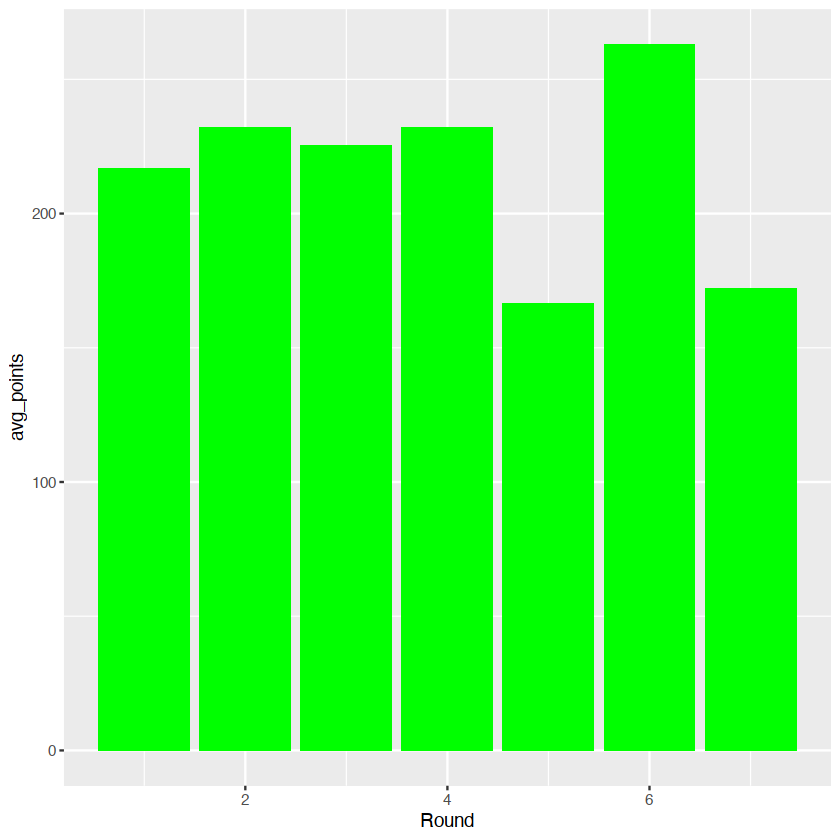

In [29]:
ggplot(round) + 
    geom_bar(aes(x=Round, y=avg_points),stat='identity', fill='green')